In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [2]:
db = dm.read_db(base='global_20210531.pkl', add=[])
db_kr = dm.read_db(base='kr_20210531.pkl', add=[])
start = '2010-12-31'
end = '2021-05-31'

# Global sector model

In [59]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=20*np.array([1]), 
    #sig_dyn_m_backs=3, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/126 [00:00<?, ?it/s]

3.3206727504730225


<Figure size 432x288 with 0 Axes>

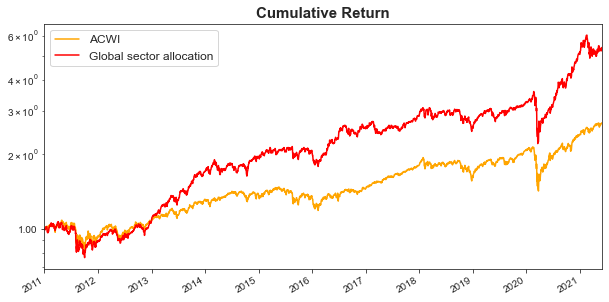

In [60]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [61]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Transportation,3.36,2621,12.25,21.87,0.56,-41.28,12.43,17.84,0.57,1.05,27.49,62.10,1.08,86.48
ConsumerService,5.02,2621,16.65,17.24,0.97,-33.31,16.20,13.48,1.21,0.90,5.73,65.32,1.30,96.07
OnlineRetail,10.46,2621,25.10,21.43,1.17,-36.07,19.65,17.39,1.26,0.95,10.24,70.16,1.17,92.23
BDC,2.31,2621,8.32,21.93,0.38,-55.44,5.98,13.03,0.48,0.84,35.46,61.29,1.02,68.60
DualMomentum,5.39,2621,17.44,21.04,0.83,-38.37,15.62,17.04,0.91,1.00,17.37,66.13,1.10,91.27


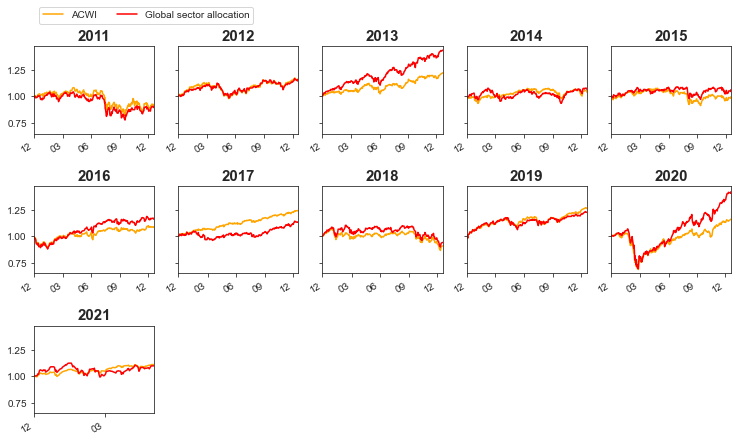

In [38]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

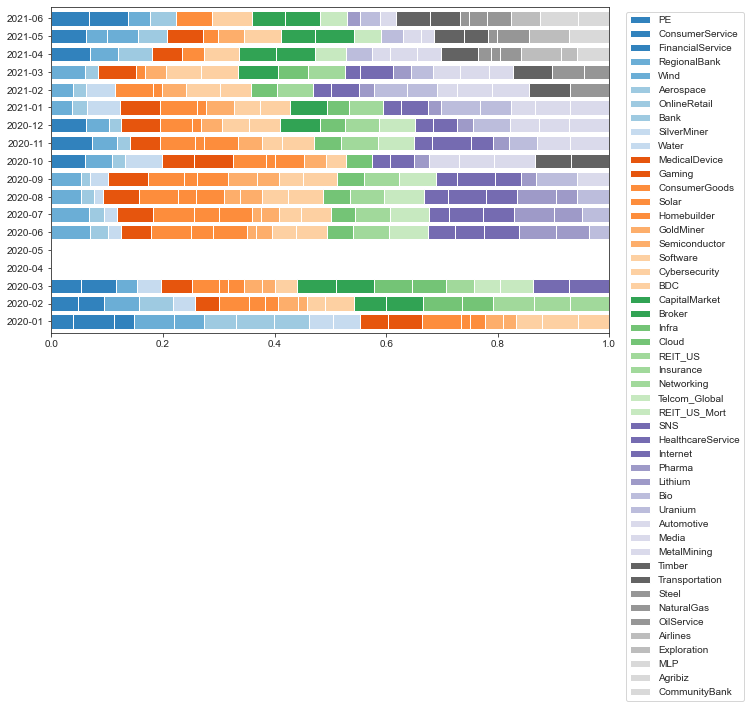

In [7]:
gsam.plot_weight([2020, 2021]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.168714
OnlineRetail    0.206631
Wind            0.266760
SNS             0.238597
Name: 2020-12-30 00:00:00, dtype: float64

In [39]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.206631
Automotive      0.266760
SNS             0.238597
OnlineRetail    0.168714
Name: 2021-01-29 00:00:00, dtype: float64

In [47]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.074197
Wind             0.181746
Lithium          0.128514
Automotive       0.165910
Semiconductor    0.196308
SNS              0.148395
OnlineRetail     0.104931
Name: 2021-01-29 00:00:00, dtype: float64

In [13]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Lithium          0.238597
SNS              0.206631
Semiconductor    0.266760
OnlineRetail     0.168714
Solar            0.119299
Name: 2021-02-26 00:00:00, dtype: float64

In [8]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Steel          0.168714
OilService     0.238597
Exploration    0.206631
Automotive     0.266760
NaturalGas     0.119299
Name: 2021-03-30 00:00:00, dtype: float64

In [14]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Steel          0.062943
MetalMining    0.109020
OilService     0.089014
Media          0.140744
Homebuilder    0.117755
Uranium        0.125885
Exploration    0.077089
MLP            0.133522
Automotive     0.099521
NaturalGas     0.044507
Name: 2021-03-30 00:00:00, dtype: float64

In [6]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

OilService        0.032433
PE                0.068800
Uranium           0.045867
RegionalBank      0.056175
NaturalGas        0.016216
Timber            0.072522
MetalMining       0.039722
Steel             0.022933
Media             0.051281
Gaming            0.053784
Airlines          0.066862
Homebuilder       0.042905
CapitalMarket     0.070686
Transportation    0.064866
Exploration       0.028088
Automotive        0.036261
REIT_US_Mort      0.062806
MLP               0.048649
BDC               0.060676
Bank              0.058469
Name: 2021-03-30 00:00:00, dtype: float64

In [8]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Uranium           0.039722
Automotive        0.028088
PE                0.060676
Agribiz           0.070686
REIT_US_Mort      0.058469
Gaming            0.053784
Airlines          0.068800
RegionalBank      0.042905
Steel             0.016216
BDC               0.064866
Timber            0.056175
Semiconductor     0.045867
Bank              0.062806
Cloud             0.072522
Wind              0.051281
MetalMining       0.022933
Broker            0.066862
Transportation    0.048649
Homebuilder       0.032433
NaturalGas        0.036261
Name: 2021-04-29 00:00:00, dtype: float64

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

CapitalMarket       0.058469
PE                  0.066862
FinancialService    0.070686
MetalMining         0.028088
RegionalBank        0.039722
Uranium             0.036261
Lithium             0.022933
NaturalGas          0.032433
Steel               0.016216
Bank                0.045867
Timber              0.060676
REIT_US_Mort        0.048649
OilService          0.042905
Agribiz             0.068800
CommunityBank       0.056175
Transportation      0.053784
Broker              0.062806
Homebuilder         0.064866
Exploration         0.051281
BDC                 0.072522
Name: 2021-05-28 00:00:00, dtype: float64

In [37]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

MetalMining     0.077089
RegionalBank    0.109020
Uranium         0.099521
Lithium         0.062943
NaturalGas      0.089014
Steel           0.044507
Bank            0.125885
REIT_US_Mort    0.133522
OilService      0.117755
Exploration     0.140744
Name: 2021-05-28 00:00:00, dtype: float64

# US factor model

In [62]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/126 [00:00<?, ?it/s]

2.8489179611206055


<Figure size 432x288 with 0 Axes>

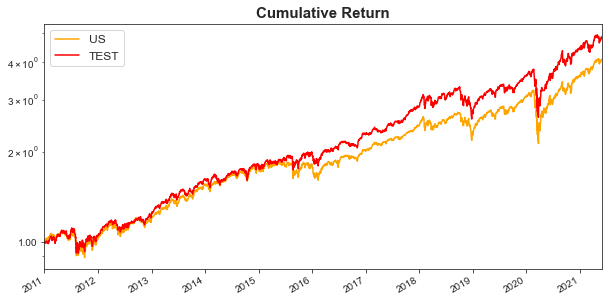

In [63]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [64]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US,4.09,2621,14.38,17.02,0.85,-33.72,15.26,13.19,1.10,0.95,6.49,71.77,0.92,97.10
Growth,4.88,2621,16.34,17.67,0.92,-31.35,16.88,13.94,1.13,0.96,4.22,66.13,1.28,97.46
Momentum,5.08,2621,16.78,18.57,0.90,-34.08,17.07,14.69,1.19,0.94,3.20,66.13,1.34,98.03
Quality,4.21,2621,14.71,16.84,0.87,-34.06,14.28,13.01,1.04,0.92,4.26,68.55,1.12,97.55
Value,3.21,2621,11.76,17.48,0.67,-37.04,11.01,13.51,0.91,0.95,16.27,67.74,0.94,93.24
ACWI,2.68,2621,9.85,17.38,0.57,-33.53,10.82,13.96,0.67,1.00,21.67,66.13,0.94,90.74
DualMomentum,4.85,2621,16.26,17.66,0.92,-31.02,16.28,14.78,1.12,0.93,3.58,64.52,1.38,98.12


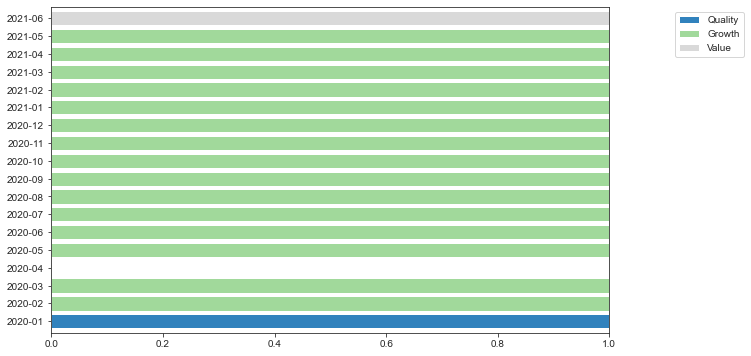

In [14]:
ufam.plot_weight([2020,2021]);

In [15]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Value    1.0
Name: 2021-05-28 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [16]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/126 [00:00<?, ?it/s]

2.6087160110473633


<Figure size 432x288 with 0 Axes>

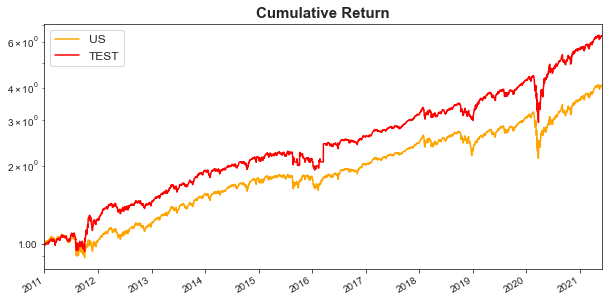

In [17]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [18]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ACWI,2.68,2621,9.85,17.38,0.57,-33.53,10.82,13.96,0.67,1.00,21.67,66.13,0.94,90.74
Momentum,5.08,2621,16.78,18.57,0.90,-34.08,17.07,14.69,1.19,0.94,3.20,66.13,1.34,98.03
LowBeta,3.36,2621,12.27,15.93,0.77,-37.13,11.74,11.69,1.07,0.78,9.02,71.77,0.88,91.94
Quality,4.21,2621,14.71,16.84,0.87,-34.06,14.28,13.01,1.04,0.92,4.26,68.55,1.12,97.55
Growth,4.88,2621,16.34,17.67,0.92,-31.35,16.88,13.94,1.13,0.96,4.22,66.13,1.28,97.46
HighFCF,4.44,2621,15.27,19.31,0.79,-38.63,14.51,15.61,0.97,1.01,20.49,65.32,1.10,89.08
HighBeta,3.80,2621,13.60,26.90,0.51,-46.84,13.82,21.34,0.61,1.37,29.38,60.48,1.14,79.60
US,4.09,2621,14.38,17.02,0.85,-33.72,15.26,13.19,1.10,0.95,6.49,71.77,0.92,97.10
Value,3.21,2621,11.76,17.48,0.67,-37.04,11.01,13.51,0.91,0.95,16.27,67.74,0.94,93.24
Momentum_EM,0.98,2621,-0.21,25.86,-0.01,-59.02,0.56,21.66,0.02,0.78,48.19,58.06,0.78,-36.78


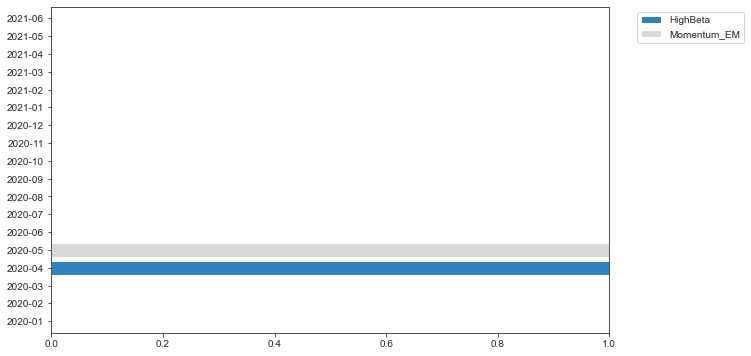

In [19]:
ufam.plot_weight([2020,2021]);

In [20]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2021-05-28 00:00:00, dtype: float64

# US-DM-EM model

In [73]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/126 [00:00<?, ?it/s]

2.8562917709350586


<Figure size 432x288 with 0 Axes>

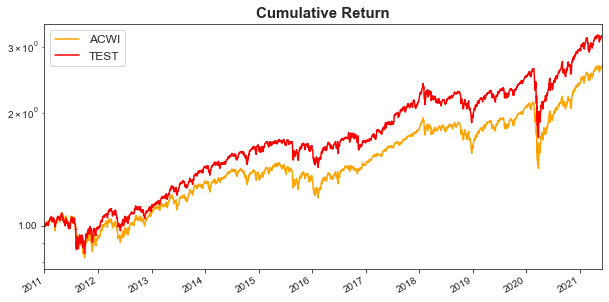

In [74]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [13]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
US_Total,4.08,2621,14.37,17.41,0.83,-35.00,15.11,13.48,1.09,0.97,8.90,71.77,0.90,96.46
EM,1.42,2621,3.41,22.07,0.15,-38.20,2.56,19.25,0.13,1.13,42.54,51.61,1.18,-6.21
ACWI,2.68,2621,9.85,17.38,0.57,-33.53,10.82,13.96,0.67,1.00,21.67,66.13,0.94,90.74
Global,1.82,2621,5.86,18.46,0.32,-34.98,5.67,14.41,0.31,1.03,35.58,60.48,0.94,67.93
DualMomentum,3.22,2621,11.80,17.90,0.66,-34.69,12.40,15.23,0.75,0.98,15.13,67.74,0.95,94.63


In [24]:
udem.weight.tail()

,Global,ACWI,EM,US_Total
2021-01-29,0.0,0.0,1.0,0.0
2021-02-26,0.0,0.0,0.0,1.0
2021-03-31,0.0,0.0,0.0,1.0
2021-04-30,0.0,0.0,0.0,1.0
2021-05-28,0.0,0.0,1.0,0.0


# Global country 낙폭과대

In [18]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)

  0%|          | 0/126 [00:00<?, ?it/s]

2.7091238498687744


<Figure size 432x288 with 0 Axes>

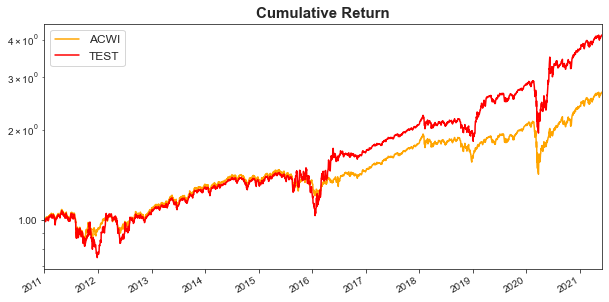

In [19]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

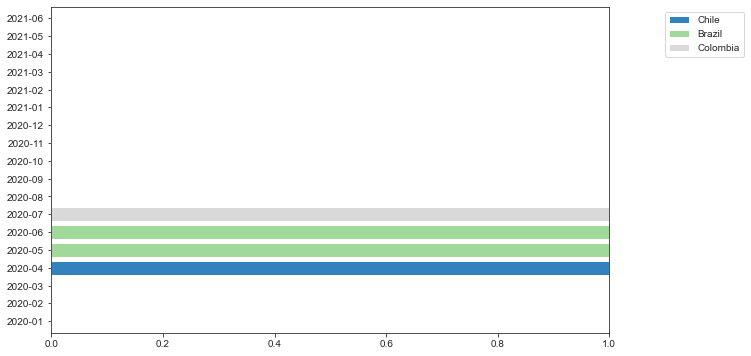

In [27]:
usm.plot_weight([2020,2021]);

In [20]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Frontier,1.38,2621,3.15,14.82,0.21,-41.63,2.53,13.06,0.21,0.52,45.45,58.06,0.91,25.15
China_largecap,1.39,2621,3.19,24.42,0.13,-44.58,4.19,22.19,0.18,1.07,38.45,58.87,0.87,33.50
Malaysia,0.92,2621,-0.84,18.61,-0.04,-50.30,0.87,16.62,0.05,0.76,47.47,50.00,1.03,12.43
Argentina,1.03,2621,0.28,28.59,0.01,-61.68,4.00,25.43,0.15,1.08,46.59,55.65,0.92,-89.92
Korea,1.75,2621,5.50,24.39,0.23,-48.93,1.85,20.44,0.08,1.13,45.78,60.48,0.88,24.25
Spain,1.28,2621,2.39,26.53,0.09,-50.93,-4.15,22.96,-0.19,1.23,56.16,53.23,1.06,5.09
Vietnam,0.90,2621,-0.96,24.82,-0.04,-60.43,-1.18,23.28,-0.05,0.83,52.36,50.81,1.05,-100.82
Mexico,0.94,2621,-0.64,24.86,-0.03,-62.19,-4.07,21.92,-0.16,1.08,59.91,58.06,0.79,33.47
Taiwan,2.58,2621,9.48,20.51,0.46,-31.34,10.20,18.33,0.59,0.92,27.99,58.06,1.15,56.54
Greece,0.74,2621,-2.85,39.30,-0.07,-79.50,-0.73,39.26,-0.02,1.16,50.63,49.19,0.94,40.02


In [29]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # adaptive로 하고, 종목을 selection에서 고르면 더 잘나옴
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_kr_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,0,0], 
    #sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL',
    cash_equiv= 'KTB10Y',
    start=start, 
    end=end, 
)

  0%|          | 0/126 [00:00<?, ?it/s]

3.1970229148864746


<Figure size 432x288 with 0 Axes>

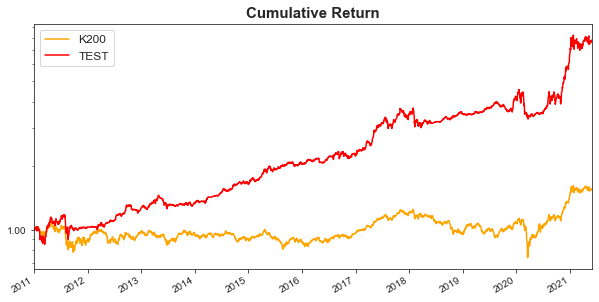

In [30]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'TEST']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=True);

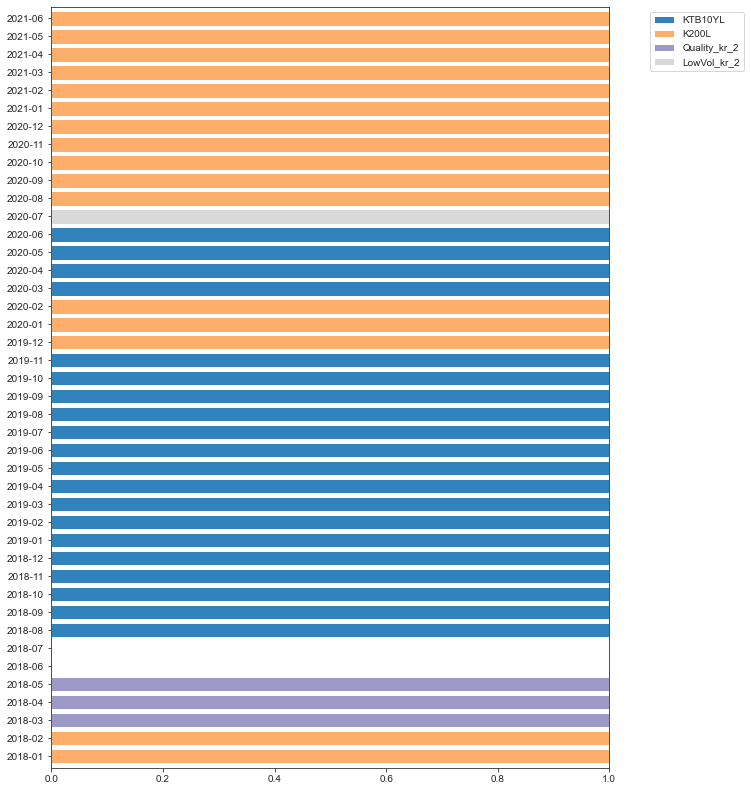

In [31]:
kfam.plot_weight([2018,2021]);

In [32]:
kfam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ACWI,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,NaN,NaN
K200,1.56,2559,4.41,17.34,0.25,-40.69,0.77,13.43,0.05,NaN,47.06,59.68,0.91,9.15
KTB10Y,1.28,2559,2.47,4.77,0.52,-9.69,3.15,4.32,0.62,NaN,33.16,63.71,0.88,66.76
DvdGrowth_kr,2.71,2559,10.23,16.66,0.61,-52.28,8.94,13.19,0.52,NaN,35.45,59.68,1.17,47.21
HighDvd_kr,1.76,2559,5.68,13.84,0.41,-52.82,6.67,10.95,0.56,NaN,33.46,61.29,0.92,60.36
MomentumGrowth_kr,1.51,2559,4.10,19.35,0.21,-55.49,0.38,15.64,0.02,NaN,49.00,55.65,1.04,-54.63
KTB10YL,1.71,2559,5.40,8.83,0.61,-19.06,6.79,8.49,0.76,NaN,33.85,63.71,0.94,66.13
ESG_kr,1.38,2559,3.21,13.33,0.24,-53.10,0.11,10.88,0.12,NaN,40.69,49.19,0.91,14.05
K200L,1.88,2559,6.35,34.61,0.18,-65.90,-2.35,26.77,-0.06,NaN,53.59,58.06,0.97,-35.10
HighBeta_kr,1.82,2559,6.04,19.17,0.31,-45.83,0.27,14.74,0.02,NaN,49.31,55.65,1.11,28.77
